# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [101]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import norm
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

In [102]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [103]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [104]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success
<p>What test is appropriate for this problem? Does CLT apply?</p>
<p>What are the null and alternate hypotheses? </p><br>
<p>Your answers to Q1 and Q2 here</p>
</div>

<div class="span5 alert alert-success">
<p> 
1. What test is appropriate for this problem? Does CLT apply?<br>
</div>

> The question we are trying to answer is whether race has significant impact on rate of callbacks for resumes. We will use a z-test since we have proportions of races (white-sounding, black-sounding) and we can evaluate if certian proportions are same.

> Yes, the data is randomly selected and sample is large enough (n>30) and we can assume independence of these resume samples as they are unique, so CLT is applicable for this scenario.


In [105]:
data[['call']].describe()

,call
count,4870.000000
mean,0.080493
std,0.272079
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


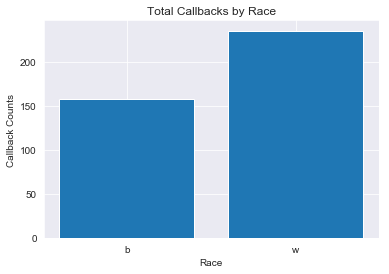

In [113]:
data_grpd = data.groupby(['race']).sum()
data_grpd.head()
sns.set_style("darkgrid")
_ = plt.bar(data_grpd.index,data_grpd['call'])
_ = plt.xlabel('Race')
_ = plt.ylabel('Callback Counts')
_ = plt.title('Total Callbacks by Race')
plt.show()

In [107]:
w = data[data.race == 'w']
b = data[data.race == 'b']

w_calls = w['call'].sort_values()
b_calls = b['call'].sort_values()

w_total = np.sum(w_calls)
w_counts = len(w_calls)
w_p = w_total/w_counts

print('Callback counts for white-sounding names:{}\n'.format(w_total))
print('Total number of white-sounding names in resumes:{}\n'.format(w_counts))
print('Propability of white-sounding names:{}\n'.format(round(w_p,3)))

b_total = np.sum(b_calls)
b_counts = len(b_calls)
b_p = b_total/b_counts

diff_in_prob = w_p - b_p

print('Callback counts for black-sounding names:{}\n'.format(b_total))
print('Total number of black-sounding names in resumes:{}\n'.format(b_counts))
print('Propability of black-sounding names:{}\n'.format(round(b_p,3)))
print('Difference in Propability:{}\n'.format(prob_diff))
w_b_total = np.sum(data['call'])
w_b_counts = len(data.call)
w_b_p = w_b_total/w_b_counts

print('Overall callback counts in data:{}\n'.format(w_b_total))
print('Total number of resumes:{}\n'.format(w_b_counts))
print('Probality of callback for resume:{}\n'.format(round(w_b_p,3)))

Callback counts for white-sounding names:235.0

Total number of white-sounding names in resumes:2435

Propability of white-sounding names:0.097

Callback counts for black-sounding names:157.0

Total number of black-sounding names in resumes:2435

Propability of black-sounding names:0.064

Difference in Propability:0.032032854209445585

Overall callback counts in data:392.0

Total number of resumes:4870

Probality of callback for resume:0.08



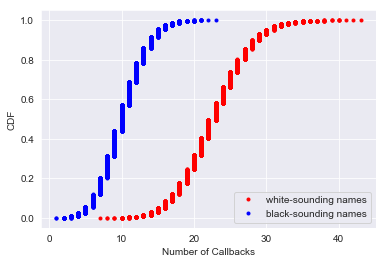

In [114]:
#Define ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

wbs = np.random.binomial(w_total,w_prob,size=10000)
bbs = np.random.binomial(b_total,b_prob,size=10000)

w_x , w_y = ecdf(wbs)
b_x, b_y = ecdf(bbs)

_ = plt.plot(w_x, w_y, marker='.',linestyle='none',color='red')
_ = plt.plot(b_x, b_y, marker='.',linestyle='none',color='blue')
_ = plt.plot()
_ = plt.xlabel("Number of Callbacks")
_ = plt.ylabel("CDF")
_ = plt.legend(('white-sounding names','black-sounding names'), loc='lower right')
plt.show()

<div class="span5 alert alert-success">
<p> 2. What are the null and alternate hypotheses?</div>

### Hypothesis Testing

> H0 - The race does not have significant impact and black and white sounding names have same proportions.<br>
> HA - The race does have a significant impact and black and white sounding names have dissimilar proportions.

<div class="span5 alert alert-success">
<p> 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches. </p>
</div>

> Bootstarp Approach<br>
> Permutation Sampling

In [128]:
# Generate a permutation sample
w_df = w_calls.values
b_df = b_calls.values

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means_w = diff_of_means(w_df,b_df)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(w_df, b_df,
                                 diff_of_means, size=10000)

# Compute p-value:
p_value = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value:{}\n'.format(p_value))

# Compute the CI
ci_95 = np.percentile(perm_replicates,[2.5,97.5])
print('95% Confidence Interval:{}\n'.format(ci_95))

# Print the Margin of Error
margin_or_err = (ci_95[0] - ci_95[1])/2
print('Margin of Error:{}\n'.format(margin_or_err))

if p_value < 0.05:
    print("Reject Null Hypothesis and Accept Alternate Hypothesis\n")
else:
    print('Fail to Reject Null Hypothesis')

p-value:0.0

95% Confidence Interval:[-0.01560576  0.01560576]

Margin of Error:-0.015605755150318146

Reject Null Hypothesis and Accept Alternate Hypothesis



> Frequentist approach<br>
> Two sample test statistic formula<br>
> z = (phat1 - phat2) - 0 / (sqrt(phat(1-phat) * (1/n1 + 1/n2)))

In [127]:
Z_stat = ((w_p - b_p) - 0 )/ (np.sqrt(w_b_p*(1-w_b_p) * (1/w_counts + 1/w_counts)))
print('Z statistic value:{}\n'.format(Z_stat))

# calculate the z_critical value with q = 0.975 since its distribution has two tails
z_critical = stats.norm.ppf(q = 0.975)
print('z_critical value:{:0.5}\n'.format(z_critical))

margin_of_error = z_critical * (np.sqrt(w_b_p*(1-w_b_p) * (1/w_counts + 1/w_counts)))
print('Margin of Error:{}\n'.format(margin_of_error))

ci_f_95_1 = diff_in_prob - margin_of_error
ci_f_95_2 = diff_in_prob + margin_of_error

print('Confidence Interval:[{} to {}]\n'.format(ci_f_95_1 ,ci_f_95_2))

p_val = 2*(1-stats.norm.cdf(abs((Z_stat))))
print('p-value:{}\n'.format(p_val,10))
                     
if Z_stat > z_critical:
    print("Reject Null Hypothesis and Accept Alternate Hypothesis\n")
else:
    print('Fail to Reject Null Hypothesis')

Z statistic value:4.108412152434346

z_critical value:1.96

Margin of Error:0.015281631502169232

Confidence Interval:[0.01675122270727635 to 0.04731448571161482]

p-value:3.983886837577444e-05

Reject Null Hypothesis and Accept Alternate Hypothesis



<div class="span5 alert alert-success">
<p>4. Write a story describing the statistical significance in the context or the original problem.</p>
</div>

> Based on the above inferential statistical tests we can reject the null Hypothesis that the propability of white-sounding names and black-sounding names are the same, the variable race in this data set does seem to show significance on receieving callbacks.

<div class="span5 alert alert-success">
<p>5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?</p>
</div>

> This analysis does not conclude that race/name is the most important factor for callback success, however, it does have a significance in getting a callback as the propabilities of receiving callback differ for the given race categories. It's also important to note that there are other variables in the dataset that might impact the callback success, but in our hypothesis testing, we only we experimenting with the race column in the dataset.